In [1]:
from google.colab import files
files.upload()

!unzip -q tabular-playground-series-mar-2021.zip

Saving tabular-playground-series-mar-2021.zip to tabular-playground-series-mar-2021.zip


In [2]:
!pip install -q catboost
!pip install -q lightgbm

     |████████████████████████████████| 65.7MB 50kB/s 


In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import *

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.linear_model import LogisticRegression





In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [5]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [6]:
train.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
target    0
dtype: int64

In [7]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250183.425697,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,144320.334812,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,0.000000,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,125399.750000,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,250192.500000,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,375246.250000,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,499999.000000,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


In [8]:
train.corr()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,1.000000,-0.000445,-0.001747,-0.002561,-0.000721,0.001114,-0.001402,0.001421,-0.000927,-0.002574,-0.001938,-0.000227,-0.001407
cont0,-0.000445,1.000000,0.474046,0.494622,0.549246,0.155805,-0.169393,-0.436555,0.740377,0.367794,0.414758,0.807896,-0.015172
cont1,-0.001747,0.474046,1.000000,0.861623,0.256854,0.133988,0.185838,0.116296,0.581201,0.672587,0.393313,0.471084,0.164655
cont2,-0.002561,0.494622,0.861623,1.000000,0.286822,0.158749,0.158240,0.066997,0.606447,0.662832,0.399063,0.506684,0.140459
cont3,-0.000721,0.549246,0.256854,0.286822,1.000000,0.222817,-0.068856,-0.429911,0.641923,0.188794,0.383062,0.611307,-0.148316
cont4,0.001114,0.155805,0.133988,0.158749,0.222817,1.000000,0.037509,-0.081020,0.231526,0.064836,0.161150,0.208428,-0.075585
cont5,-0.001402,-0.169393,0.185838,0.158240,-0.068856,0.037509,1.000000,0.439221,-0.094008,0.141199,0.120901,-0.160551,0.215184
cont6,0.001421,-0.436555,0.116296,0.066997,-0.429911,-0.081020,0.439221,1.000000,-0.361585,0.123390,-0.125960,-0.443371,0.189832
cont7,-0.000927,0.740377,0.581201,0.606447,0.641923,0.231526,-0.094008,-0.361585,1.000000,0.479203,0.443322,0.775453,-0.040646
cont8,-0.002574,0.367794,0.672587,0.662832,0.188794,0.064836,0.141199,0.123390,0.479203,1.000000,0.293181,0.382051,0.183726


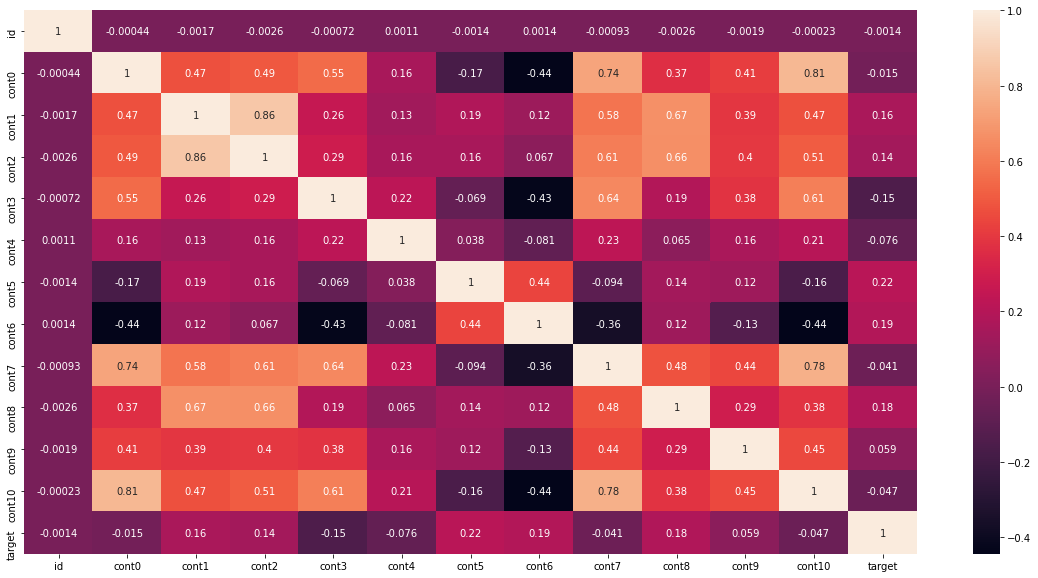

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


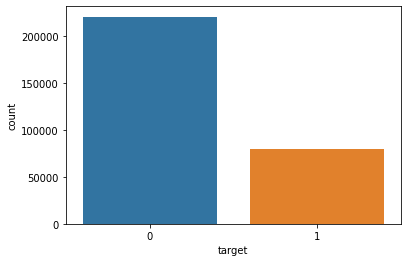

In [10]:
sns.countplot(train.target)

In [14]:
for c in train.columns:
  if train[c].dtype == 'object':
    lb = LabelEncoder()
    train[c] = lb.fit_transform(train[c].values)
    test[c] = lb.fit_transform(test[c].values)
   


    
print(train.head())

   id  cat0  cat1  cat2  cat3  ...     cont7     cont8     cont9    cont10  target
0   0     0     8     0     1  ...  0.791921  0.815254  0.965006  0.665915       0
1   1     0     8     0     0  ...  0.408701  0.399353  0.927406  0.493729       0
2   2     0    10     0     0  ...  0.388835  0.412303  0.292696  0.549452       0
3   3     0    10     0     2  ...  0.897617  0.633669  0.760318  0.934242       0
4   4     0     8     6     1  ...  0.279167  0.351103  0.357084  0.328960       1

[5 rows x 32 columns]


In [15]:
train = train.drop('id',axis = 1)

In [16]:
test = test.drop('id',axis = 1)

In [17]:
y = train['target']

In [18]:
X = train.drop('target',axis = 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [20]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((240000, 30), (60000, 30), (240000,), (60000,))

In [21]:
rf = RandomForestClassifier(random_state=0,n_estimators=200,max_depth=20)

In [22]:
rf_fit = rf.fit(X_train,y_train)

In [23]:
rf_pred = rf_fit.predict(X_test)

In [24]:
from sklearn.metrics  import roc_auc_score,accuracy_score

In [25]:
rf_fit.score(X_train,y_train)

0.9509916666666667

In [26]:
rf_fit.score(X_test,y_test)

0.8445

In [27]:
rf_pred1 = rf_fit.predict_proba(X_test)[:,1]

In [28]:
roc_auc_score(y_test,rf_pred1)

0.8846387347273876

Balancing Data

In [29]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [30]:
ros = RandomOverSampler()

In [31]:
x_rand , y_rand = ros.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [32]:
x_rand.shape , y_rand.shape

((441078, 30), (441078,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


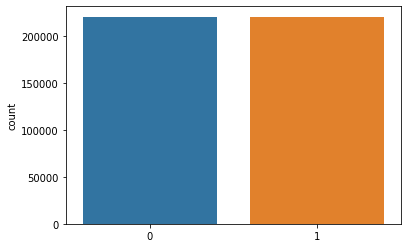

In [33]:
sns.countplot(y_rand)

In [34]:
x_train,x_test,Y_train,Y_test = train_test_split(x_rand,y_rand,random_state = 0,test_size = 0.2)

In [35]:
rf1 = RandomForestClassifier(random_state=0)
rf_fit_rand = rf1.fit(x_train,Y_train)

In [36]:
rf_predict_rand = rf1.predict(x_test)

In [37]:
rf_pred_rand = rf_fit_rand.predict_proba(x_test)[:,1]

In [38]:
roc_auc_score(Y_test,rf_pred_rand)

0.9824691963073232

In [39]:
roc_auc_score(Y_test,rf_predict_rand)

0.9326149175736387

In [40]:
prediction = rf_fit_rand.predict(test)

In [41]:
pred = pd.DataFrame(prediction,columns=['target'])

In [42]:
sub1 = sub.drop('target',axis = 1)

In [43]:
final = pd.concat([sub1,pred],axis = 1)

In [44]:
from google.colab import files


final.to_csv('final.csv')



files.download('final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
xgb = XGBClassifier(max_depth=20,learning_rate=0.5,n_estimators=500,n_jobs = -1)

In [46]:
xgb_fit = xgb.fit(x_train,Y_train)

In [47]:
xgb_pred = xgb_fit.predict(x_test)

In [48]:
xgb_pred_prob = xgb_fit.predict_proba(x_test)[:,1]

In [50]:
roc_auc_score(Y_test,xgb_pred_prob)

0.9791611214179688

In [52]:
pred_test = xgb_fit.predict(test.values)

In [55]:
pred1 = pd.DataFrame(pred_test,columns=['target'])

In [56]:
final = pd.concat([sub1,pred1],axis = 1)

In [57]:
final.to_csv('final1.csv')

files.download('final1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>